In [1]:
import tensorflow as tf
from keras.datasets import cifar10

In [2]:
(X_train,y_train), (X_test,y_test) = cifar10.load_data()

170508288/170498071 [==============================] - 2s 0us/step


In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

In [7]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

In [8]:
disp_ind = []
for i in range(10):
  disp_ind.append(np.random.randint(0, X_train.shape[0]))

disp_ind

[4811, 38128, 47823, 48444, 9654, 49714, 38134, 14287, 10419, 23259]

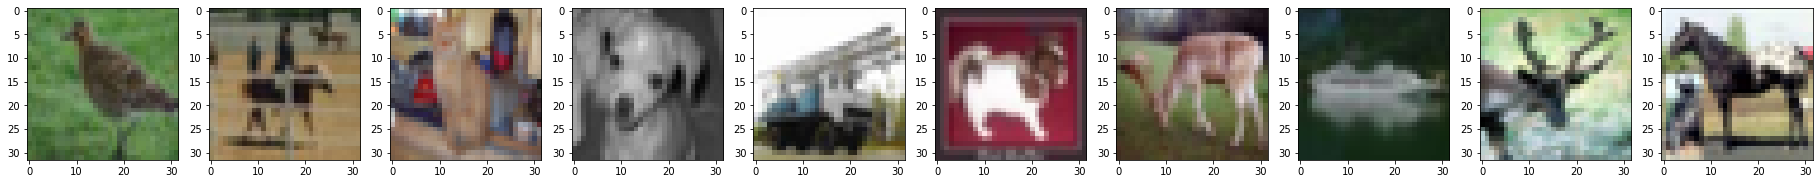

In [9]:
fig,ax = plt.subplots(1,10,figsize=(32,32))
for i in range(len(disp_ind)):
  ax[i].imshow(X_train[disp_ind[i]])

In [10]:
from tensorflow.keras.utils import to_categorical

In [11]:
y_train_ohe = to_categorical(y_train)
print(y_train_ohe.shape)
y_test_ohe = to_categorical(y_test)
print(y_test_ohe.shape)

(50000, 10)
(10000, 10)


In [12]:
X_train_flt = X_train.astype(float)
X_test_flt = X_test.astype(float)

X_train_norm = X_train_flt/255
X_test_norm = X_test_flt/255

print(X_train_norm.shape)
print(X_test_norm.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
from keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Flatten,MaxPooling2D,Dropout,BatchNormalization
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 20s 5ms/step - loss: 1.3302 - accuracy: 0.5212 - val_loss: 1.0193 - val_accuracy: 0.6387
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9036 - accuracy: 0.6809 - val_loss: 0.9227 - val_accuracy: 0.6788
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.6795 - accuracy: 0.7599 - val_loss: 0.8696 - val_accuracy: 0.6991
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.4739 - accuracy: 0.8344 - val_loss: 1.0323 - val_accuracy: 0.6783
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.2942 - accuracy: 0.8979 - val_loss: 1.0925 - val_accuracy: 0.7009
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.1800 - accuracy: 0.9378 - val_loss: 1.3472 - val_accuracy: 0.6855
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1201 - accuracy: 0.9585 - val_loss: 1.6040 - val_accuracy

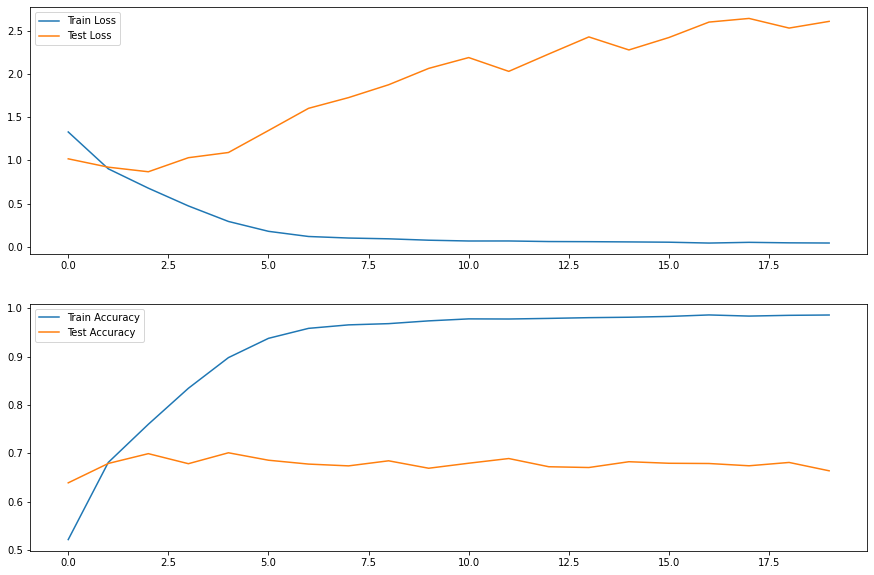

In [15]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 3ms/step - loss: 2.6106 - accuracy: 0.6636


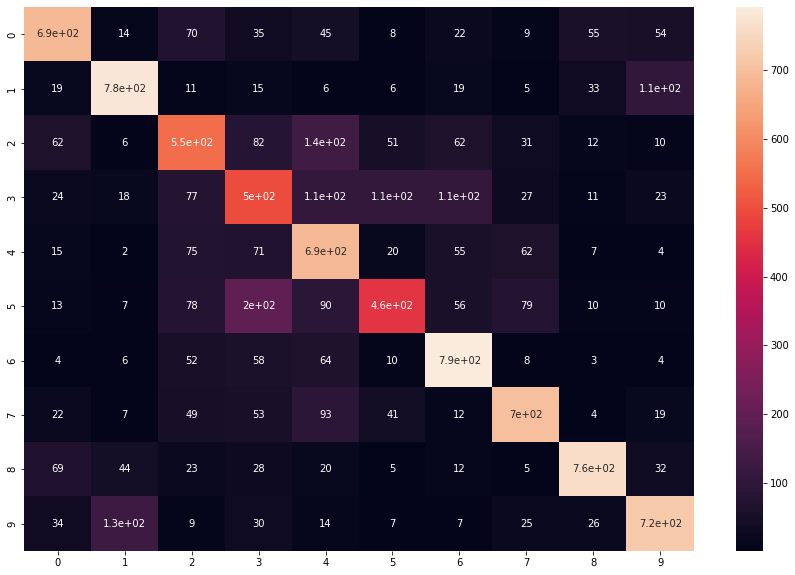

In [16]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 2 VGG blocks and trained on train dataset

In [17]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 10s 6ms/step - loss: 1.3769 - accuracy: 0.4998 - val_loss: 1.1539 - val_accuracy: 0.5904
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8964 - accuracy: 0.6836 - val_loss: 0.8308 - val_accuracy: 0.7083
Epoch 3/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.6785 - accuracy: 0.7612 - val_loss: 0.7867 - val_accuracy: 0.7304
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5169 - accuracy: 0.8180 - val_loss: 0.8535 - val_accuracy: 0.7234
Epoch 5/20
1563/1563 [==============================] - 9s 5ms/step - loss: 0.3667 - accuracy: 0.8725 - val_loss: 0.9056 - val_accuracy: 0.7303
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.2514 - accuracy: 0.9105 - val_loss: 1.0486 - val_accuracy: 0.7289
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.1869 - accuracy: 0.9354 - val_loss: 1.0884 - val_accuracy

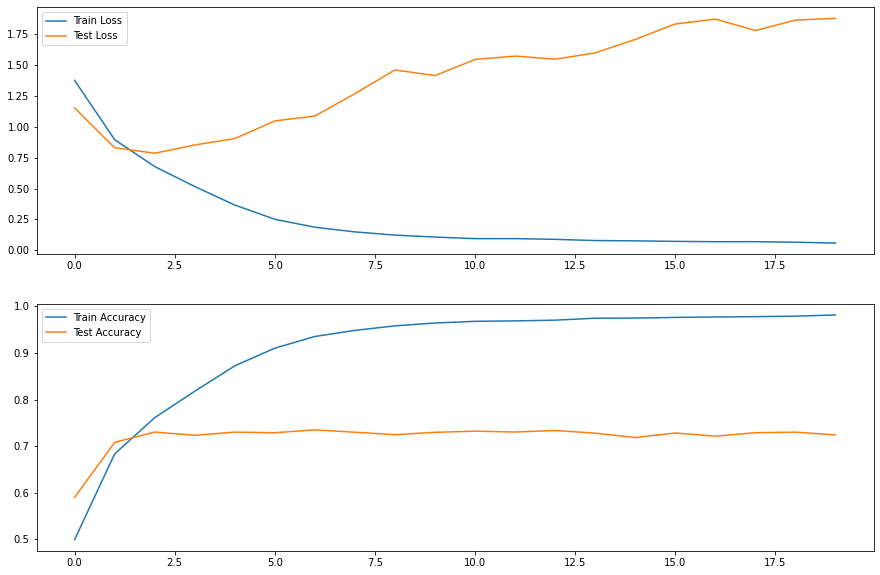

In [18]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 3ms/step - loss: 1.8792 - accuracy: 0.7243


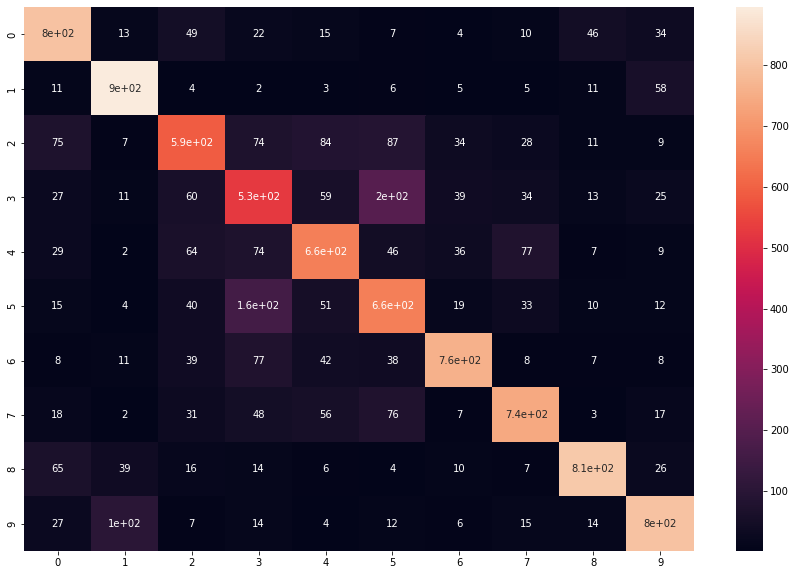

In [19]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Building a CNN Model with 3 VGG blocks and trained on train dataset

In [20]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=20,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.6319 - accuracy: 0.3901 - val_loss: 1.2574 - val_accuracy: 0.5472
Epoch 2/20
1563/1563 [==============================] - 9s 6ms/step - loss: 1.0950 - accuracy: 0.6095 - val_loss: 1.0140 - val_accuracy: 0.6425
Epoch 3/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.8615 - accuracy: 0.6991 - val_loss: 0.8520 - val_accuracy: 0.7046
Epoch 4/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7177 - accuracy: 0.7492 - val_loss: 0.8357 - val_accuracy: 0.7162
Epoch 5/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.6066 - accuracy: 0.7869 - val_loss: 0.8325 - val_accuracy: 0.7266
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.5105 - accuracy: 0.8198 - val_loss: 0.8096 - val_accuracy: 0.7397
Epoch 7/20
1563/1563 [==============================] - 10s 6ms/step - loss: 0.4318 - accuracy: 0.8466 - val_loss: 0.8267 - val_accura

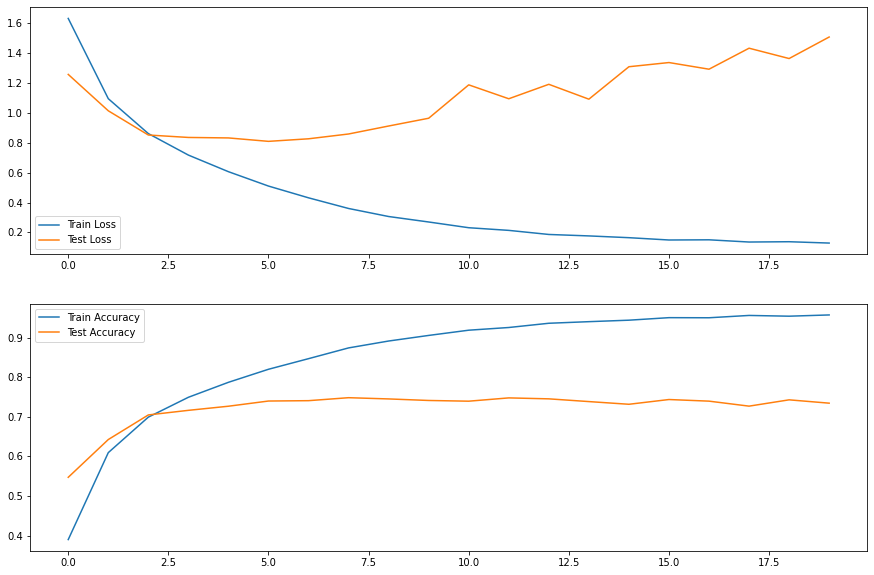

In [21]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 3ms/step - loss: 1.5076 - accuracy: 0.7343


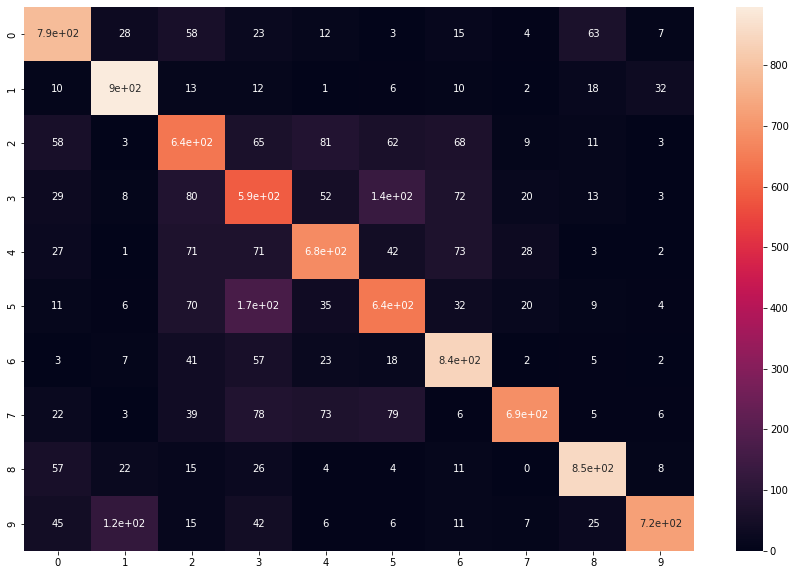

In [22]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.2 and trained on train dataset

In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.2)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.2)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 2.3031 - accuracy: 0.1011 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0998 - val_loss: 2.3027 - val_accuracy: 0.1000
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3029 - accuracy: 0.0990 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 5/50
1563/1563 [==============================] - 9s 6ms/step - loss: 2.3028 - accuracy: 0.0973 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0993 - val_loss: 2.3026 - val_accuracy: 0.1000
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 2.3028 - accuracy: 0.0980 - val_loss: 2.3026 - val_acc

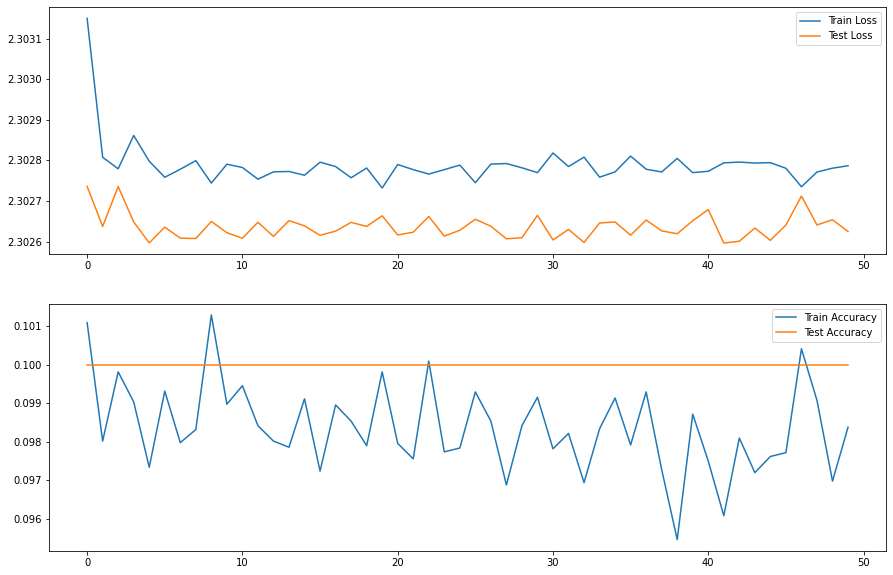

In [24]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 4ms/step - loss: 2.3026 - accuracy: 0.1000


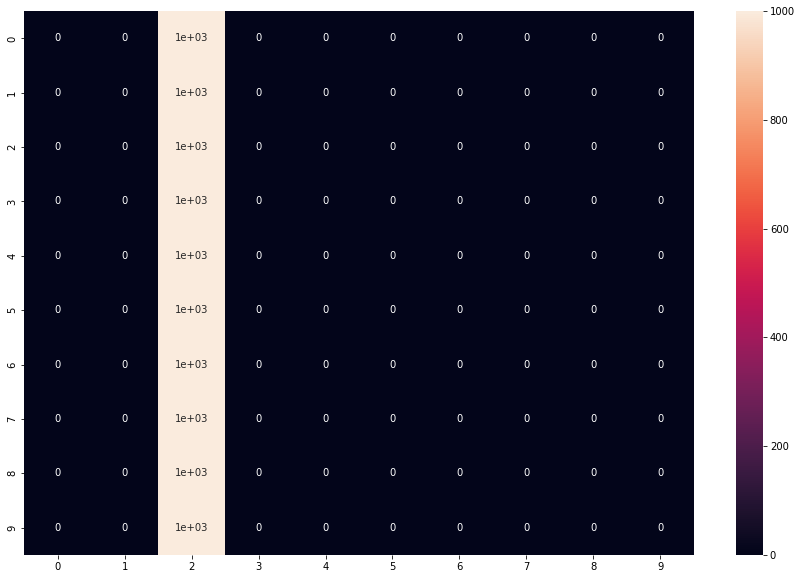

In [25]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.3 and trained on train dataset

In [26]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8569 - accuracy: 0.3030 - val_loss: 1.4757 - val_accuracy: 0.4615
Epoch 2/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.3893 - accuracy: 0.4953 - val_loss: 1.1568 - val_accuracy: 0.5799
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2194 - accuracy: 0.5613 - val_loss: 1.0854 - val_accuracy: 0.6144
Epoch 4/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.1170 - accuracy: 0.6033 - val_loss: 0.9752 - val_accuracy: 0.6562
Epoch 5/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0616 - accuracy: 0.6243 - val_loss: 0.9328 - val_accuracy: 0.6709
Epoch 6/50
1563/1563 [==============================] - 10s 7ms/step - loss: 1.0077 - accuracy: 0.6472 - val_loss: 0.8905 - val_accuracy: 0.6851
Epoch 7/50
1563/1563 [==============================] - 10s 7ms/step - loss: 0.9683 - accuracy: 0.6583 - val_loss: 0.8894 - val_ac

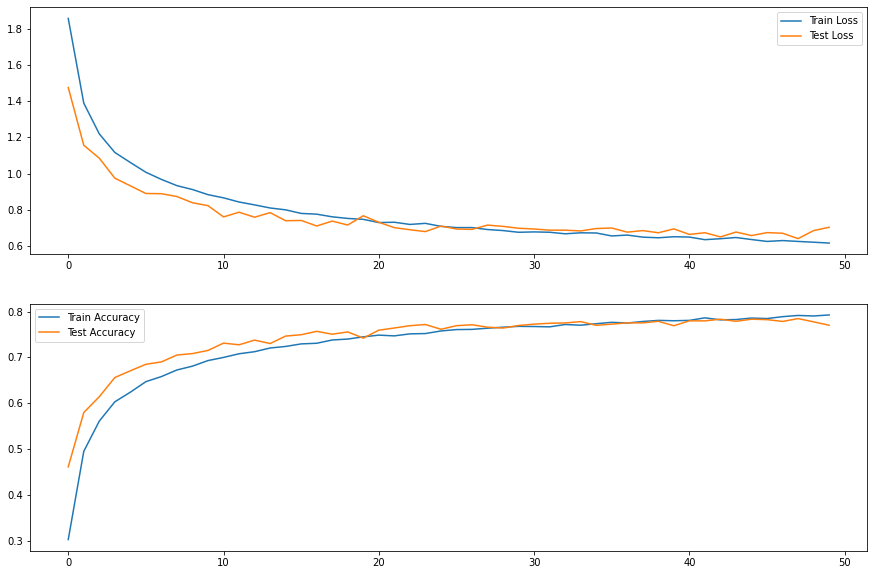

In [27]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 4ms/step - loss: 0.7041 - accuracy: 0.7702


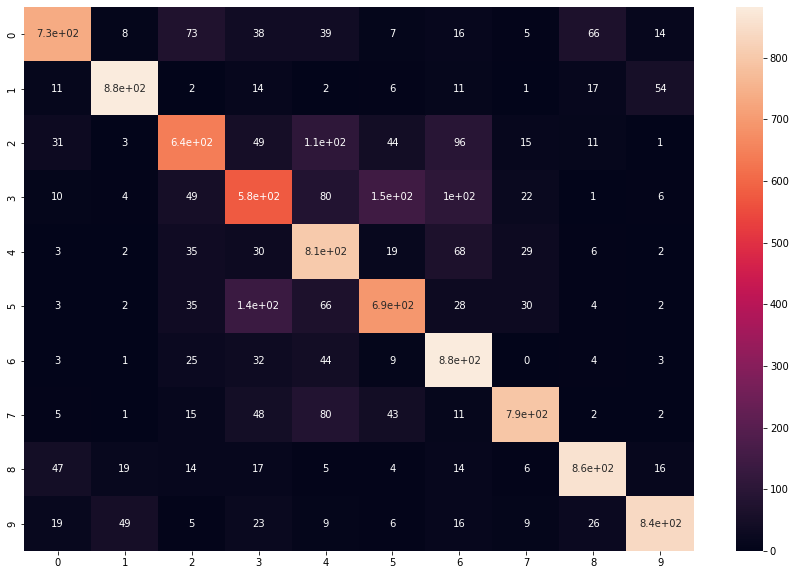

In [28]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding a dropout layer with dropout of 0.4 and trained on train dataset

In [29]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.4)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.4)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.8103 - accuracy: 0.3273 - val_loss: 1.4360 - val_accuracy: 0.4801
Epoch 2/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.4259 - accuracy: 0.4851 - val_loss: 1.3650 - val_accuracy: 0.4968
Epoch 3/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.2819 - accuracy: 0.5446 - val_loss: 1.1266 - val_accuracy: 0.5953
Epoch 4/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1959 - accuracy: 0.5808 - val_loss: 1.0128 - val_accuracy: 0.6394
Epoch 5/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.1405 - accuracy: 0.6013 - val_loss: 1.1301 - val_accuracy: 0.5981
Epoch 6/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0958 - accuracy: 0.6163 - val_loss: 1.0002 - val_accuracy: 0.6368
Epoch 7/50
1563/1563 [==============================] - 10s 6ms/step - loss: 1.0492 - accuracy: 0.6367 - val_loss: 0.9354 - val_ac

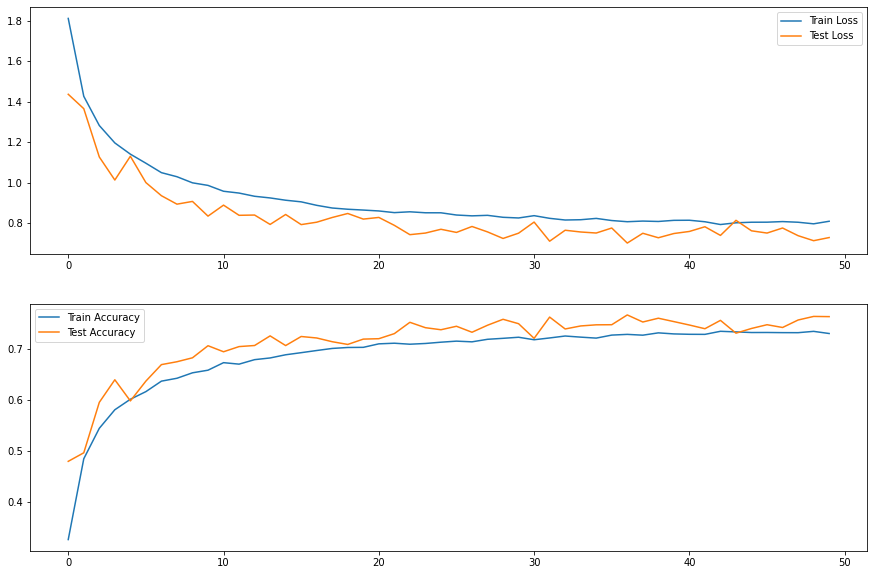

In [30]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 4ms/step - loss: 0.7289 - accuracy: 0.7627


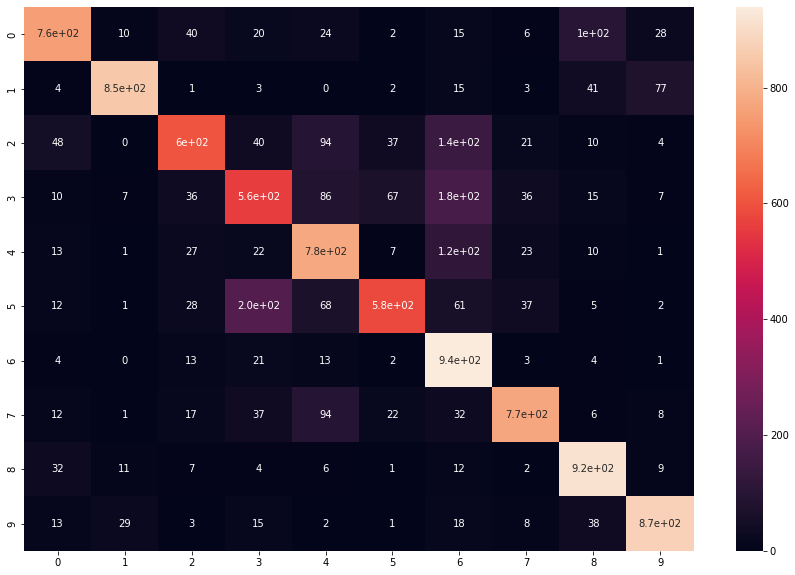

In [31]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding batch Normalization layer and trained on train dataset

In [32]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal',input_shape=(32,32,3)))
model.add(BatchNormalization())
model.add(Conv2D(filters=32,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(Conv2D(filters=128,kernel_size=(3,3),padding="same",activation='relu',kernel_initializer='glorot_normal'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add((Dropout(0.3)))
model.add(Flatten())
model.add(Dense(units=512,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=128,activation='relu',kernel_initializer='glorot_normal'))
model.add((Dropout(0.3)))
model.add(Dense(units=10,activation='softmax'))
model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x=X_train_norm,y=y_train_ohe,batch_size=32,epochs=50,validation_data=(X_test_norm,y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 12s 7ms/step - loss: 1.6364 - accuracy: 0.4106 - val_loss: 1.2605 - val_accuracy: 0.5471
Epoch 2/50
1563/1563 [==============================] - 11s 7ms/step - loss: 1.1606 - accuracy: 0.5949 - val_loss: 1.0784 - val_accuracy: 0.6246
Epoch 3/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.9793 - accuracy: 0.6653 - val_loss: 0.8637 - val_accuracy: 0.7004
Epoch 4/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.8609 - accuracy: 0.7085 - val_loss: 0.9343 - val_accuracy: 0.6837
Epoch 5/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7836 - accuracy: 0.7363 - val_loss: 0.8048 - val_accuracy: 0.7216
Epoch 6/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.7210 - accuracy: 0.7546 - val_loss: 0.6863 - val_accuracy: 0.7614
Epoch 7/50
1563/1563 [==============================] - 11s 7ms/step - loss: 0.6675 - accuracy: 0.7754 - val_loss: 0.6175 - val_ac

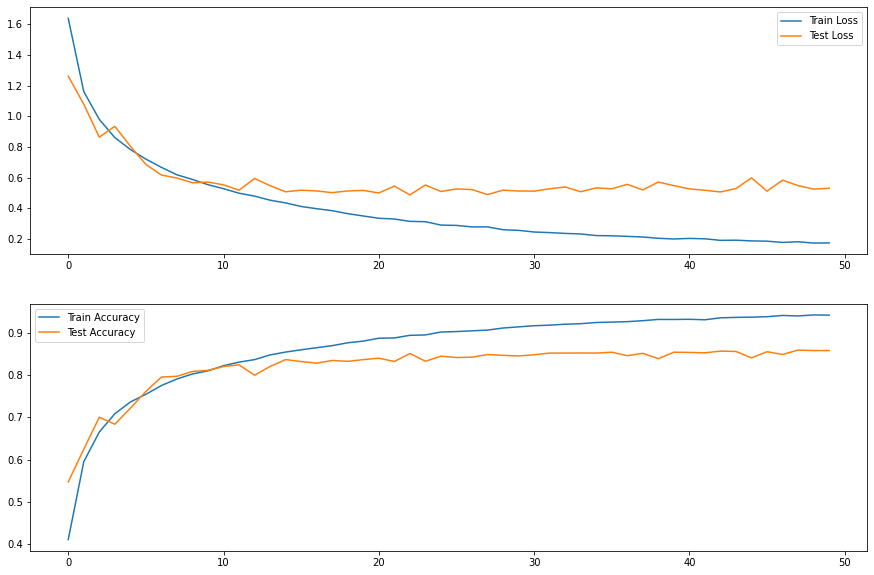

In [33]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 4ms/step - loss: 0.5312 - accuracy: 0.8582


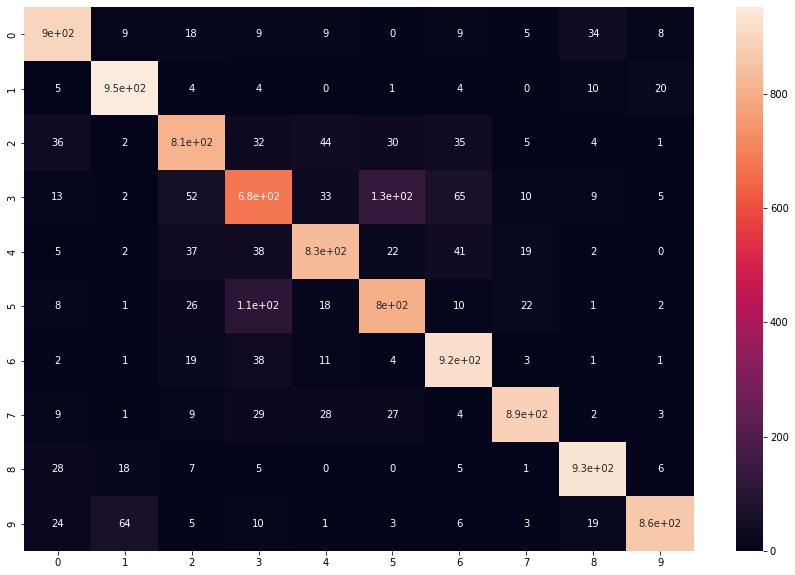

In [34]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)

# Adding batch normalization improved the accuracy of the model from 79.17% to 86.12%

In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation on train data and training the model on generated data along with train data

In [36]:
datagen = ImageDataGenerator(height_shift_range=0.2,horizontal_flip=True)
it_train = datagen.flow(X_train_norm, y_train_ohe, batch_size=32)
history = model.fit(it_train, epochs=50, validation_data=(X_test_norm, y_test_ohe))

Epoch 1/50
1563/1563 [==============================] - 28s 17ms/step - loss: 0.6315 - accuracy: 0.7975 - val_loss: 0.4835 - val_accuracy: 0.8380
Epoch 2/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5573 - accuracy: 0.8168 - val_loss: 0.4244 - val_accuracy: 0.8556
Epoch 3/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5423 - accuracy: 0.8201 - val_loss: 0.4989 - val_accuracy: 0.8313
Epoch 4/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.5262 - accuracy: 0.8274 - val_loss: 0.4426 - val_accuracy: 0.8522
Epoch 5/50
1563/1563 [==============================] - 27s 18ms/step - loss: 0.5119 - accuracy: 0.8306 - val_loss: 0.4571 - val_accuracy: 0.8465
Epoch 6/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4953 - accuracy: 0.8354 - val_loss: 0.4101 - val_accuracy: 0.8658
Epoch 7/50
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4846 - accuracy: 0.8400 - val_loss: 0.4491 -

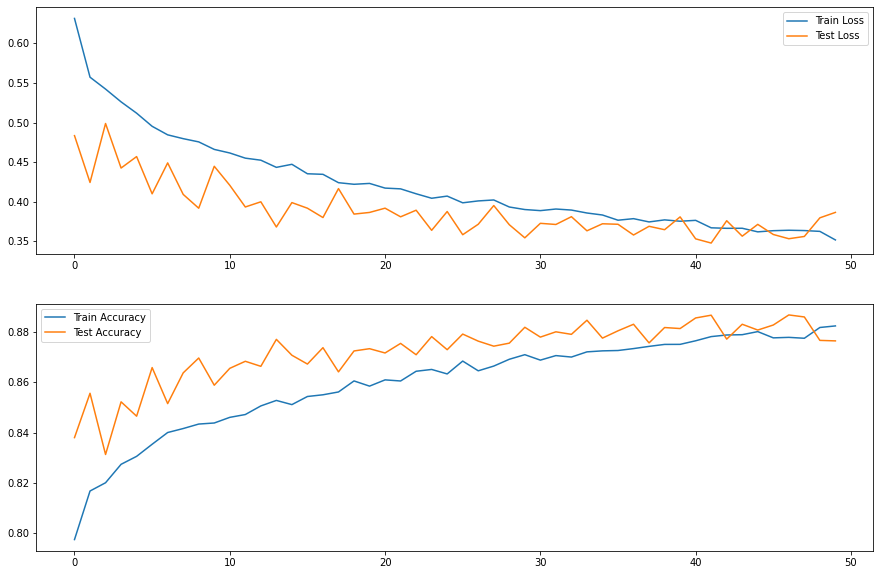

In [37]:
fig,ax=plt.subplots(2,figsize=(15,10))
ax[0].plot(history.history['loss'],label='Train Loss')
ax[0].plot(history.history['val_loss'],label='Test Loss')
ax[0].legend()
ax[1].plot(history.history['accuracy'],label='Train Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Test Accuracy')
ax[1].legend()

313/313 [==============================] - 1s 4ms/step - loss: 0.3866 - accuracy: 0.8764


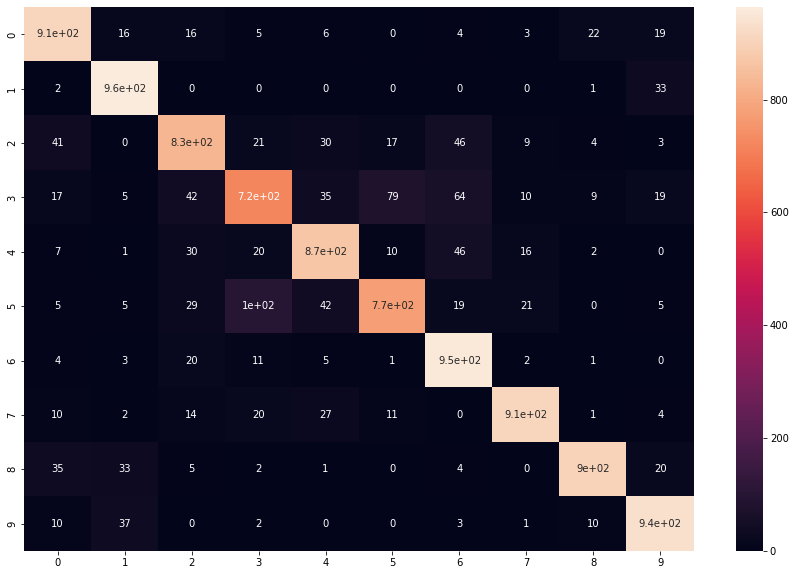

In [38]:
evaluation = model.evaluate(x=X_test_norm,y=y_test_ohe,batch_size=32)
y_test_pred = model.predict(X_test_norm)
y_test_pred = np.argmax(y_test_pred,axis=1)
cm = confusion_matrix(y_test,y_test_pred)
plt.figure(figsize=(15,10))
sns.heatmap(cm,annot=True)